Leather Limited manufactures two types of belts: the deluxe and the regular model. Each type requires 1 sq yd of leather. A regular belt requires 1 hour of skilled labor, and a deluxe belt requires 2 hours. Each week, 40 sq yd of leather and 60 hours of skilled labor are available. Each regular belt contributes $3 to profit and each deluxe belt, $4. Formulate mathematical model to maximize the profit.



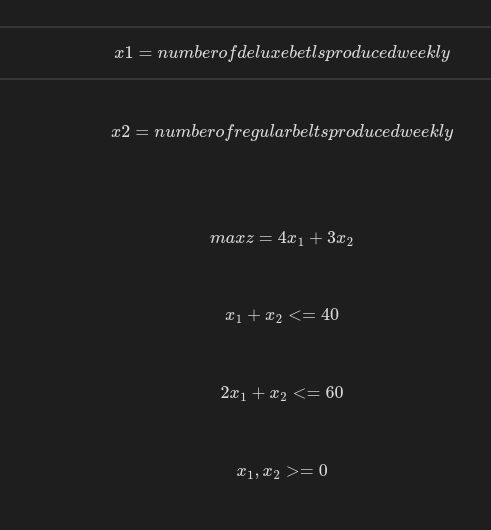

In [51]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [52]:
# Define objetive function

def objetive_function(x1, x2):
    return 4*x1 + 3*x2

# Constraints

def constraint_one(x1, x2):
    return (x1 + x2) <= 50

def constraint_two(x1, x2):
    return (2*x1 + x2) <= 60


In [55]:
def genetica_algorith(population_size, num_generation):
    
    # Initilization

    population: list = []
    fitness_history: list = []
    
    for p in range(population_size):
        x1 = random.uniform(0, 40)
        x2 = random.uniform(0, 60)
        population.append((x1, x2))
        
    best_solution = None
    best_fitness = float('-inf')

    for generation in range(num_generation):

        # Evaluation
        
        fitness = [objetive_function(x1, x2) for x1, x2 in population]
        feasible_population = [
            individual for individual in population if constraint_one(
                individual[0], individual[1]
                ) and constraint_two(
                    individual[0], individual[1]
                    )
                ]


        # Selection

        if feasible_population:
            feasible_fitness = [objetive_function(x1, x2) for x1, x2 in feasible_population]
            parents = random.choices(population, weights=fitness)
        else:
            parents = []
            while len(parents)<population_size:
                potencial_parents = random.choice(population, weights=fitness)
                if constraint_one(potencial_parents[0], potencial_parents[1]) and constraint_two(potencial_parents[0], potencial_parents()):
                    parents.append(potencial_parents)

        # Crossover
        offspring: list = []
        for i in range(population_size):
            parent1, parent2 = random.choices(parents, k=2)
            x1_child = random.uniform(min(parent1[0],parent2[0]),max(parent1[0],parent2[0]))
            x2_child = random.uniform(min(parent1[1],parent2[1]),max(parent1[1],parent2[1]))
            offspring.append((x1_child,x2_child))


        # Parent1: (x1=10 , x2=5)
        # Parent2: (x1=20 , x2=15)
        # The minimum value is min(parent1[0],parent2[0]) = min(10,20) = 10
        # The Maximum value is max(parent1[0],parent2[0]) = max(10,20) = 20
        # random.uniform(10,20)    x1_child = 17
        # The minimum value is min(parent1[1],parent2[1]) = min(5,15) = 5
        # The Maximum value is max(parent1[1],parent2[1]) = max(5,15) = 15
        # random.uniform(5,15)    x2_child = 11
        # offspring: (x1=17,x2=11)
        
        # Mutation
     
        mutation_rate = 1/(generation+1) # Dynamic mutation rate
        for i in range(population_size):
            if random.random()<mutation_rate:
                offspring[i] = (random.uniform(0,40),random.uniform(0,60))

# mutation_rate = 1/(1+1) = 0.5
# random.random() = 0.75
# No mutations occur

# random.random() = 0.2 < mutation_rate(0.5)
# New values for the offspring after mutation (new_x1, new_x2)

# Beginning = Exploration - High mutation rate
# Later generations - Exploitation - Low mutation rate

        # Elitism

        if best_solution is not None:
            offspring[0] = best_solution

        population = offspring


        # Find the best feasible solution
        feasible_solutions: list = [
            (x1, x2) for (x1, x2) in population if constraint_one(x1,x2)  and constraint_two(x1,x2)
        ]


        if feasible_solutions:
            best_solution = max(feasible_solutions, key=lambda x: objetive_function(x[0], x[1]))
            best_fitness = objetive_function(best_solution[0], best_solution[1])
        fitness_history.append(best_fitness)


        print(f'Generation{generation+1}: Best solution = {best_solution}, Best Fitness = {best_fitness}')
        
        
    #Plot the fitness progress
    plt.plot(range(1,num_generation+1),fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("GA - Fitness Progress")
    plt.show()


    return best_solution,best_fitness
        

## Call the GA function

Generation1: Best solution = (7.990085561615059, 40.93528921786233), Best Fitness = 154.76620990004724
Generation2: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation3: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation4: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation5: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation6: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation7: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation8: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation9: Best solution = (11.712312177226472, 36.22645309053011), Best Fitness = 155.52860798049622
Generation10: Best solution = (11.712312177226472, 36.22645309053

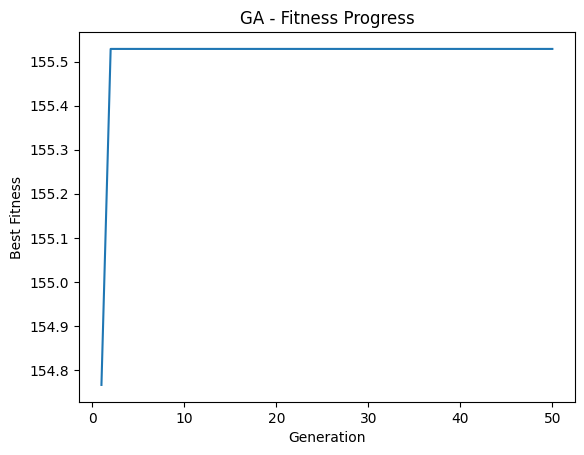

Final best solution: (11.712312177226472, 36.22645309053011)
Final best fitness: 155.52860798049622


In [56]:
population_size = 100
num_generation = 50

best_solution, best_fitness = genetica_algorith(population_size, num_generation)

if best_solution is not None:
    print('Final best solution:', best_solution)
    print('Final best fitness:', best_fitness)
else:
    print('No Feasible solution found within the given constraints')


